In [1]:
import pickle as pk
import cv2
import numpy as np
from random import shuffle

In [2]:
import matplotlib.pyplot as plt

In [3]:
with open("../../data_labels.pk", 'rb') as f:
    data_labels = pk.load(f)

In [4]:
list(data_labels.keys())[0]

'0270.jpg'

In [5]:
data_labels['0270.jpg']

{'pottedplant': [((16.249695, 22.759016),
   1832.393310546875,
   1071.14697265625)]}

In [6]:
new_data_labels = dict()
for image in data_labels.keys():
    new_data_labels[image] = dict()
    count = 0
    if data_labels[image]:
        new_data_labels[image]['labels'] = data_labels[image]
        for detected_label in data_labels[image]:
            count += len(data_labels[image][detected_label])
            
        
        new_data_labels[image]['count'] = count
    else:
        new_data_labels[image]['labels'] = dict()
        new_data_labels[image]['count'] = 0

In [7]:
new_data_labels['0270.jpg']

{'labels': {'pottedplant': [((16.249695, 22.759016),
    1832.393310546875,
    1071.14697265625)]},
 'count': 1}

In [8]:
bar_plot_data = dict()
for image in new_data_labels.keys():
    if new_data_labels[image]['count'] not in bar_plot_data:
        bar_plot_data[new_data_labels[image]['count']] = 0
    bar_plot_data[new_data_labels[image]['count']] += 1

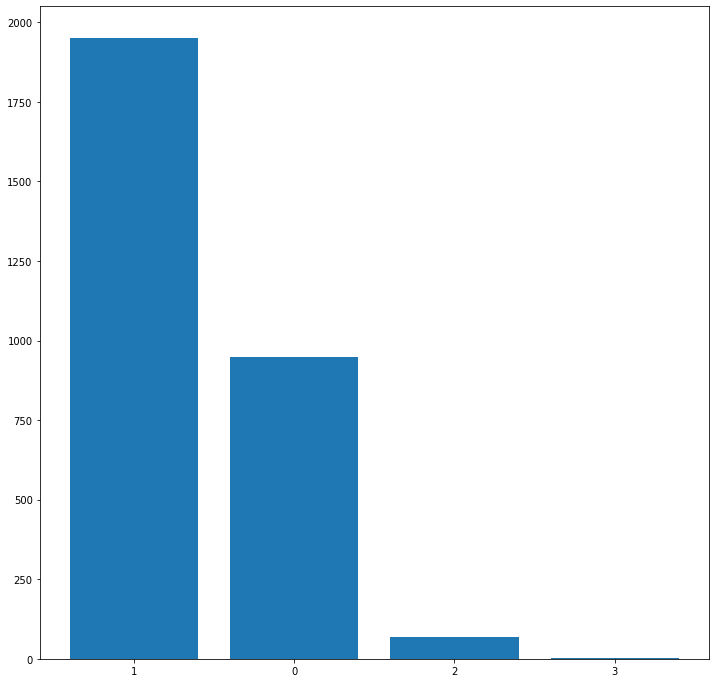

{1: 1952, 0: 947, 2: 67, 3: 1}

In [18]:
plt.figure(figsize=(12,12))
plt.bar(range(len(bar_plot_data)), list(bar_plot_data.values()))
plt.xticks(range(len(bar_plot_data)), list(bar_plot_data.keys()))
plt.show()
bar_plot_data

In [10]:
kind_of_label = dict()
count_in_2 = 0
for image in new_data_labels.keys():
    if new_data_labels[image]['count'] == 1:
        label = list(new_data_labels[image]['labels'].keys())[0]
        if label not in kind_of_label:
            kind_of_label[label] = 0
        kind_of_label[label] += 1
    if new_data_labels[image]['count'] > 1:
        if 'pottedplant' in list(new_data_labels[image]['labels'].keys()):
            count_in_2 += 1

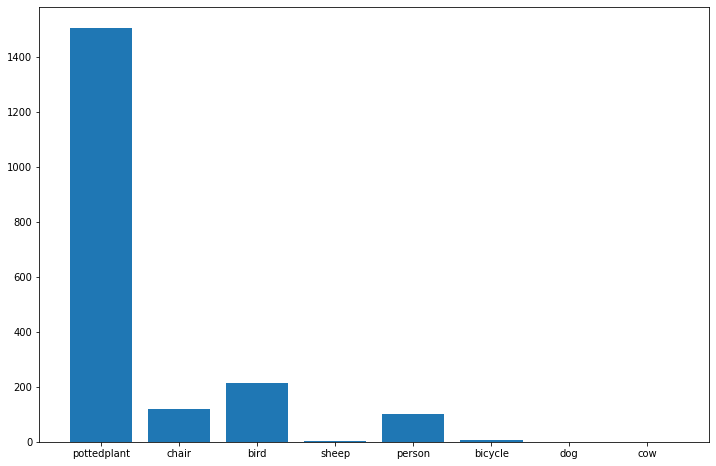

{'pottedplant': 1506, 'chair': 119, 'bird': 212, 'sheep': 3, 'person': 102, 'bicycle': 8, 'dog': 1, 'cow': 1}

Number of images with potted plants where there are 2 or more predictions:  59


In [19]:
plt.figure(figsize=(12,8))
plt.bar(range(len(kind_of_label)), list(kind_of_label.values()))
plt.xticks(range(len(kind_of_label)), list(kind_of_label.keys()))
plt.show()
print (kind_of_label)
print ("\nNumber of images with potted plants where there are 2 or more predictions: ", count_in_2)

In [20]:
def plot(path, image):
    img = cv2.imread(path + image, cv2.IMREAD_COLOR)  # uncomment if dataset not downloaded
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    plt.imshow(rgb_image)  # plot the image for matplotlib
    plt.title(image)
    currentAxis = plt.gca()
    
    color = colors[0]
    for label_name in new_data_labels[image]['labels'].keys():
        for i in range(len(new_data_labels[image]['labels'][label_name])):
            coords = new_data_labels[image]['labels'][label_name][i]
            display_txt = '%s'%(label_name)
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(coords[0][0], coords[0][1], display_txt, bbox={'facecolor':color, 'alpha':0.5})

In [32]:
images_to_plot = []
for image in new_data_labels:
    if new_data_labels[image]['count'] != 0:
        images_to_plot.append(image)

shuffle(images_to_plot)

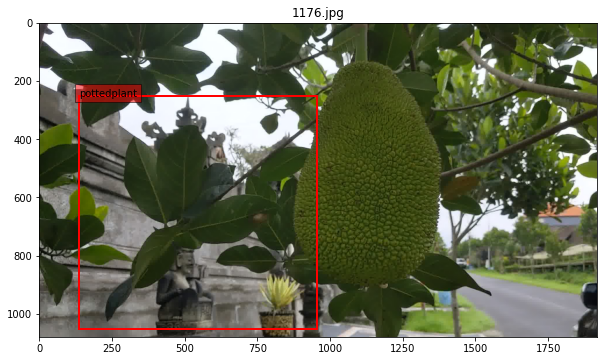

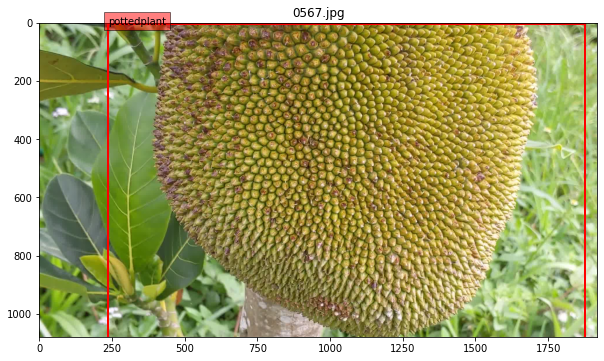

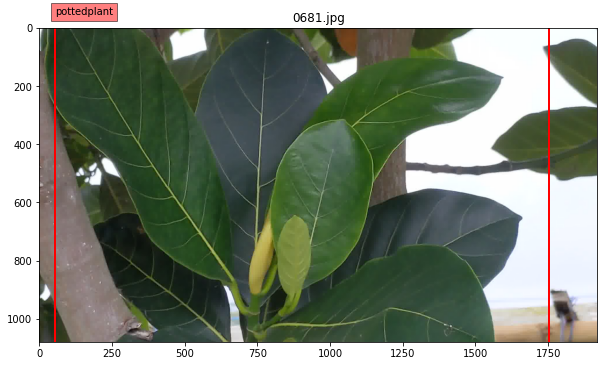

In [33]:
for image in images_to_plot[:3]:
    plot("../../bali-26/jackfruit/", image)